In [23]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [24]:
import numpy as np
import pandas as pd

In [25]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [26]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [27]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [28]:
 # reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [29]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [30]:
# Save references to each table
measurements = Base.classes.measurement
stations = Base.classes.station

In [31]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

Text(0, 0.5, 'Measurement')

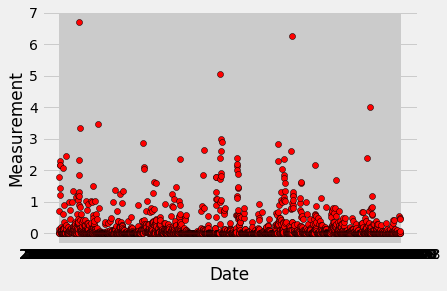

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database
last_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
results = session.query(measurements.date, measurements.prcp).filter(measurements.date >= last_year).all()

# Save the query results as a Pandas DataFrame and set the index to the date column
data = pd.DataFrame(results, columns=['date', 'precipitation'])

# Sort the dataframe by date
data = data.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
x_axis=data["date"]
y_axis=data["precipitation"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.xlabel("Date")
plt.ylabel("Measurement")

In [37]:
# Use Pandas to calcualte the summary statistics for the precipitation data
data.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [39]:
# Design a query to show how many stations are available in this dataset?
session.query(func.count(stations.station)).all()

[(9)]

In [41]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(measurements.station, func.count(1)).\
    group_by(measurements.station).\
    order_by(func.count(1).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [45]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
sel = [measurements.station,
       func.min(measurements.tobs),
       func.max(measurements.tobs),
       func.avg(measurements.tobs)]

session.query(*sel).\
    filter(measurements.station == "USC00519281").all()

[('USC00519281', 54.0, 85.0, 71.66378066378067)]

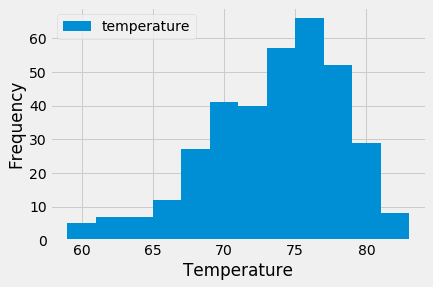

In [50]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
precipitation_df = pd.DataFrame(session.query(measurements.date, measurements.tobs).\
    filter(measurements.date > last_year).\
    filter(measurements.station == "USC00519281").\
    order_by(measurements.date).all(), columns = ["Date", "temperature"])

# plot the results as a histogram
precipitation_df.plot(kind = "hist", bins = 12)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.savefig("output/fig1.png");